<a href="https://colab.research.google.com/github/gmokyere/CustomTensorflow/blob/main/C1_W3_Lab_1_lambda_layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input,Dense, Dropout, Lambda, Flatten
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K
from tensorflow.python.keras.utils.vis_utils import plot_model


# Data

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images, test_images = train_images/255., test_images/255.0


4423680/4422102 [==============================] - 0s 0us/step


# Lambda layer

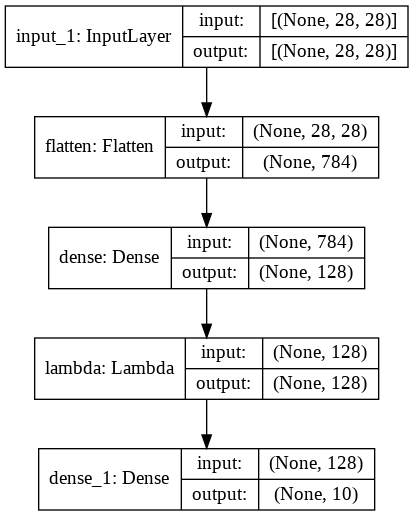

In [3]:
def my_relu(x):
    return K.maximum(-0.1,x)



## Model
def model():
    input_x = Input(shape=(28,28))
    x = Flatten()(input_x)
    x = Dense(128)(x)
    x = tf.keras.layers.Lambda(my_relu)(x)
    x = Dense(10, activation= 'softmax')(x)
    return Model(inputs = input_x, outputs = x)

model = model()
plot_model(model, show_shapes=True)

In [4]:
model.compile(loss = tf.losses.sparse_categorical_crossentropy,
              optimizer='adam',
              metrics= ['accuracy'])

model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6146 - accuracy: 0.7857
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3810 - accuracy: 0.8628
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3369 - accuracy: 0.8773
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3168 - accuracy: 0.8824
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2965 - accuracy: 0.8921
